In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style = "whitegrid",font_scale = 1.5)
%matplotlib inline
plt.rcParams['figure.figsize']=[12,8]

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 86F2-D32F

 Directory of C:\

20/06/2023  04:03 PM    <DIR>          anomaly detection
18/06/2023  09:45 PM    <DIR>          Intel
31/10/2021  06:05 AM    <DIR>          MinGW
05/06/2021  02:10 PM    <DIR>          PerfLogs
17/06/2023  09:42 AM    <DIR>          Program Files
10/06/2023  02:25 PM    <DIR>          Program Files (x86)
17/06/2023  11:32 AM    <DIR>          proj
29/09/2022  10:05 AM    <DIR>          softwares
28/09/2022  09:07 AM    <DIR>          Users
14/06/2023  03:29 PM    <DIR>          Windows
17/06/2023  10:53 AM        14,808,437 yolov5s.pt
               1 File(s)     14,808,437 bytes
              10 Dir(s)  137,339,031,552 bytes free


In [ ]:
dataset = pd.read_csv ('anomaly detection\distillation-tower.csv')

In [ ]:
#let's get some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            253 non-null    object 
 1   Temp1           253 non-null    float64
 2   FlowC1          253 non-null    float64
 3   Temp2           253 non-null    float64
 4   TempC1          253 non-null    float64
 5   Temp3           253 non-null    float64
 6   TempC2          253 non-null    float64
 7   TempC3          253 non-null    float64
 8   Temp4           253 non-null    float64
 9   PressureC1      253 non-null    float64
 10  Temp5           253 non-null    float64
 11  Temp6           253 non-null    float64
 12  OC1             253 non-null    float64
 13  Temp7           253 non-null    float64
 14  Temp8           253 non-null    float64
 15  TempC9          253 non-null    float64
 16  FlowC2          253 non-null    float64
 17  Temp9           253 non-null    flo

In [ ]:
#let's see the dataset
dataset

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure,Status
0,21/08/2000,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026,1
1,23/08/2000,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598,1
2,26/08/2000,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666,0
3,29/08/2000,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064,1
4,30/08/2000,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,26/01/2003,130.8138,212.6385,341.5964,121.4354,468.3401,467.0299,174.7639,180.7649,229.7393,...,5.5590,6.4470,16.4131,466.3347,2.1444,2.9274,2.2127,4.0911,38.8507,0
249,28/01/2003,128.9673,225.1412,349.8965,118.8604,479.7665,478.4652,176.2176,182.3646,230.5049,...,5.6342,6.4360,17.2385,477.8816,2.0926,2.8580,2.1620,4.0783,34.2653,0
250,31/01/2003,130.5328,223.5965,345.9366,120.4027,474.5378,473.1145,176.3310,182.2578,230.6638,...,5.4810,6.3575,16.9866,472.3176,2.1172,2.8907,2.1855,4.0756,36.5717,0
251,03/02/2003,128.5248,213.5613,343.4950,119.6989,469.3802,467.9954,174.6435,180.5093,230.5226,...,5.4727,6.4175,16.6778,467.0001,2.1413,2.9113,2.2090,4.0780,38.1054,0


In [ ]:
#check if there is any null value
(dataset.isnull().sum().sort_values(ascending=False)/len(dataset))*100

Date              0.0
TempC9            0.0
VapourPressure    0.0
InvPressure1      0.0
InvTemp3          0.0
InvTemp2          0.0
InvTemp1          0.0
Temp12            0.0
Temp11            0.0
FlowC4            0.0
FlowC3            0.0
Temp10            0.0
Temp9             0.0
FlowC2            0.0
Temp8             0.0
Temp1             0.0
Temp7             0.0
OC1               0.0
Temp6             0.0
Temp5             0.0
PressureC1        0.0
Temp4             0.0
TempC3            0.0
TempC2            0.0
Temp3             0.0
TempC1            0.0
Temp2             0.0
FlowC1            0.0
Status            0.0
dtype: float64

In [ ]:
#convert date to index
#dataset['index'] = pd.to_datetime(dataset['Date'])
#dataset.index = dataset['index']

In [ ]:
dataset.drop(['Date'],inplace = True,axis=1)
dataset.head()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure,Status
0,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,489.0043,...,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026,1
1,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,479.0443,...,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598,1
2,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,485.1326,...,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666,0
3,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,490.4338,...,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064,1
4,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,486.1049,...,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238,0


preprocessing

In [ ]:
pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 1.1 MB/s eta 0:00:08
                                              0.2/8.3 MB 2.1 MB/s eta 0:00:04
     -                                        0.3/8.3 MB 2.6 MB/s eta 0:00:04
     --                                       0.4/8.3 MB 2.4 MB/s eta 0:00:04
     --                                       0.5/8.3 MB 2.3 MB/s eta 0:00:04
     --                                       0.6/8.3 MB 2.2 MB/s eta 0:00:04
     ---                                      0.8/8.3 MB 2.4 MB/s eta 0:00:04
     ----                                     0.9/8.3 MB 2.4 MB/s eta 0:00:04
     -----                                    1.1/8.3 MB 2.6 MB/s eta 0:00:03
     -----                                    1.2/8.3 MB 2.7 MB/s eta 0:00:03
     ------                                   1.3/8.3 MB 2.6 MB/s eta 0:00:03
     ------                                   1.4/8.3 MB 2.6 MB/s eta 0

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset2 = dataset.drop('Status',axis=1)
col_names=dataset2.columns

#scaling
scaler=StandardScaler()
dataset2_scaled= scaler.fit_transform(dataset2)
dataset2_scaled = pd.DataFrame(dataset2_scaled,columns=col_names)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(dataset2_scaled)

PCA()

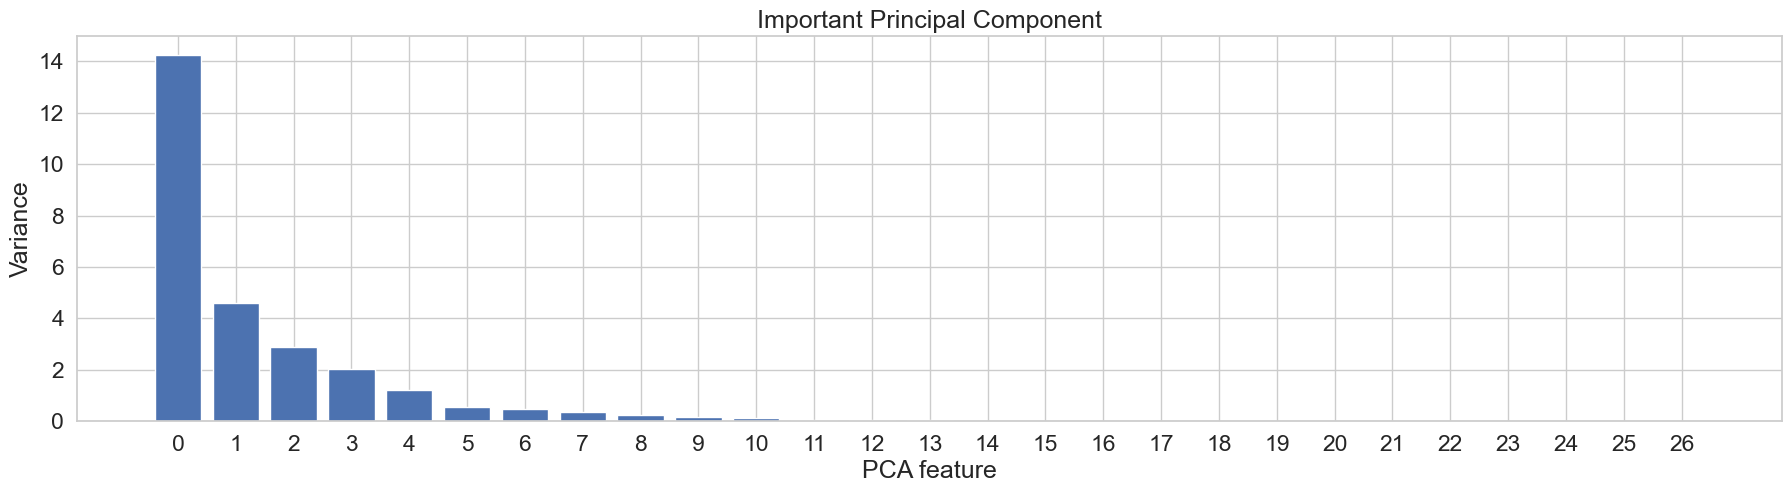

In [ ]:
features = range(pca.n_components_)
_=plt.figure(figsize=(22,5))
_=plt.bar(features,pca.explained_variance_)
_=plt.xlabel('PCA feature')
_=plt.ylabel('Variance')
_=plt.xticks(features)
_=plt.title('Important Principal Component')
plt.show()

In [ ]:
#calculate PCA with 2 components
pca = PCA(n_components=2)
pComponents = pca.fit_transform(dataset2_scaled)
principal_df = pd.DataFrame(data = pComponents,columns=['pca1','pca2'])

In [ ]:
principal_df.head()

,pca1,pca2
0,-2.987294,3.532937
1,-1.191590,4.563682
2,-2.084853,3.230201
3,-2.900897,3.558572
4,-2.297980,3.179503


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(principal_df['pca1'])

#print p-value
print(result[1])

0.1948286252289555


In [ ]:
#autocorrelation
#compute change in daily mean
pca1= principal_df['pca1'].pct_change()

#Compute Autocorelation
autoco = pca1.dropna().autocorr()
print('Autocorrelation is:',autoco)

Autocorrelation is: -0.006236482460388716


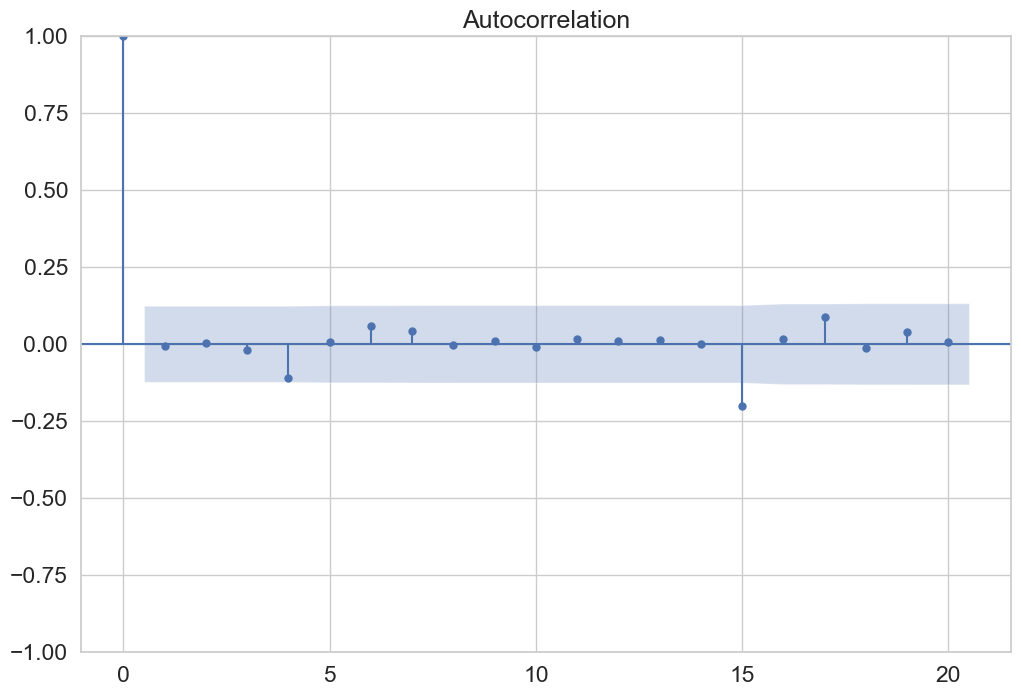

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(),lags=20,alpha=0.05)
plt.show()

In [ ]:
#import kmeans
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=13)
kmeans.fit(principal_df.values)

KMeans(n_clusters=2, random_state=13)

In [ ]:
labels = kmeans.predict(principal_df.values)

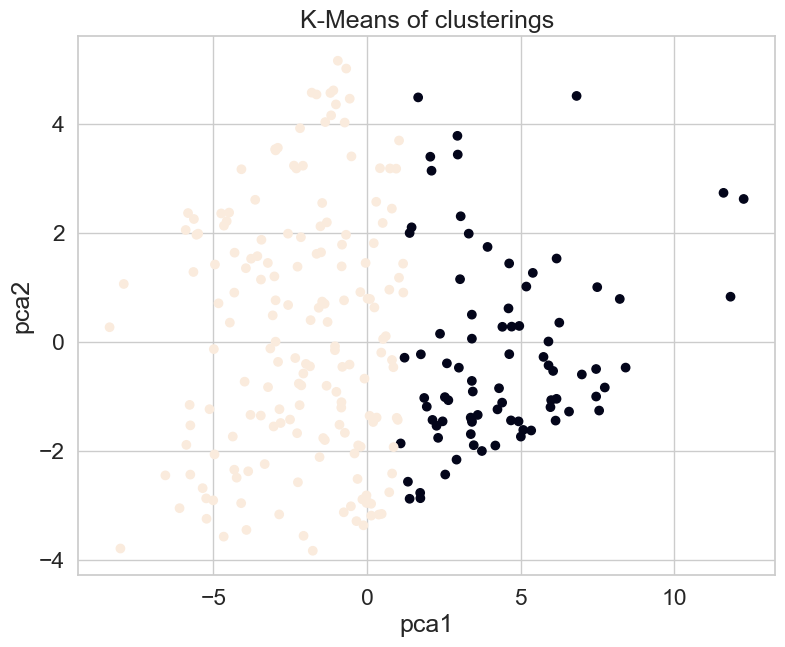

In [ ]:
#plotting the clusters
_=plt.figure(figsize=(9,7))
_=plt.scatter(principal_df['pca1'],principal_df['pca2'],c=labels)
_=plt.xlabel('pca1')
_=plt.ylabel('pca2')
_=plt.title('K-Means of clusterings')
plt.show()

In [ ]:
#write a function that calucalates distance between each point and the centroid of the closest cluster


def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster,
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [ ]:
# Assume that 13% of the entire data set are anomalies
outliers_fraction = 0.13

# get the distance between each point and its nearest centroid.
# the biggest distances are considered as anomaly
distance = getDistanceByPoint(principal_df, kmeans)

# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))

# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

# anomaly1 contains the anomaly result of the above method Cluster (0:normal, 1:anomaly)
principal_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [ ]:
principal_df.head()

,pca1,pca2,kmeans_anomaly
0,-2.987294,3.532937,0
1,-1.191590,4.563682,0
2,-2.084853,3.230201,0
3,-2.900897,3.558572,0
4,-2.297980,3.179503,0


In [ ]:
principal_df["kmeans_anomaly"].value_counts()

kmeans_anomaly
0    221
1     32
Name: count, dtype: int64

In [ ]:
dfBroken = dataset[dataset["Status"]== 1]

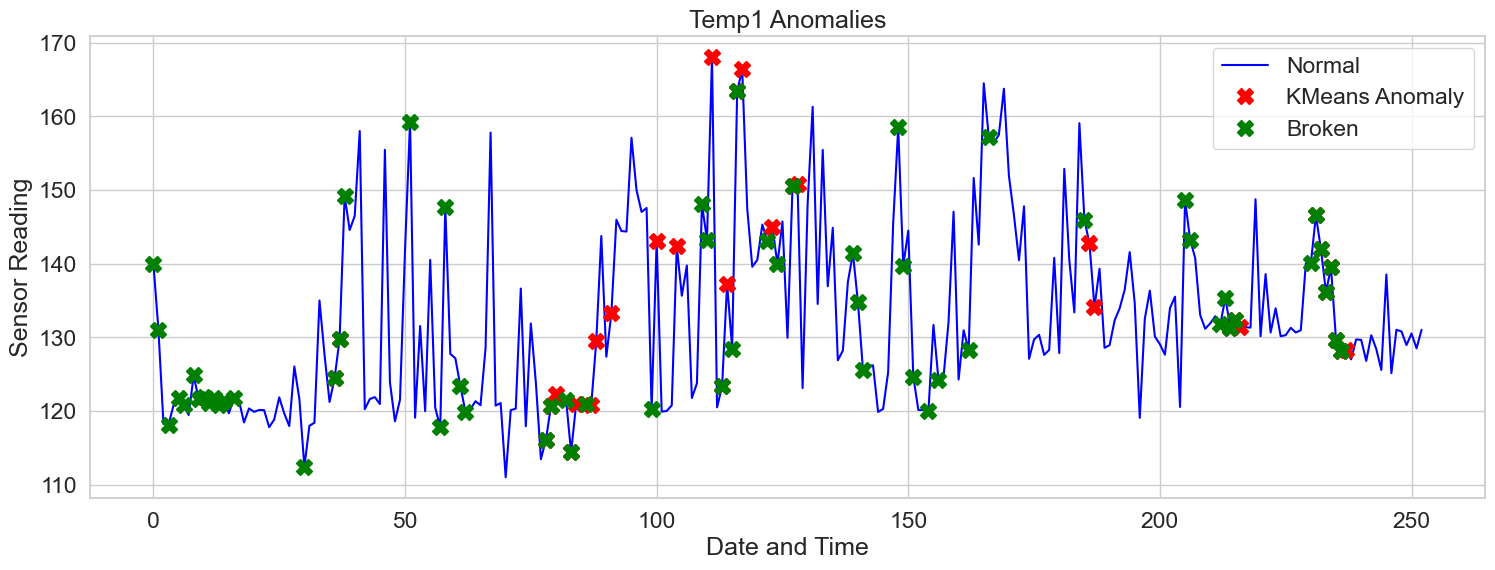

In [ ]:
dataset['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=dataset.index)
a = dataset[dataset['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(dataset['Temp1'], color='blue', label='Normal')
_ = plt.plot(a['Temp1'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['Temp1'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Temp1 Anomalies')
_ = plt.legend(loc='best')
plt.show()

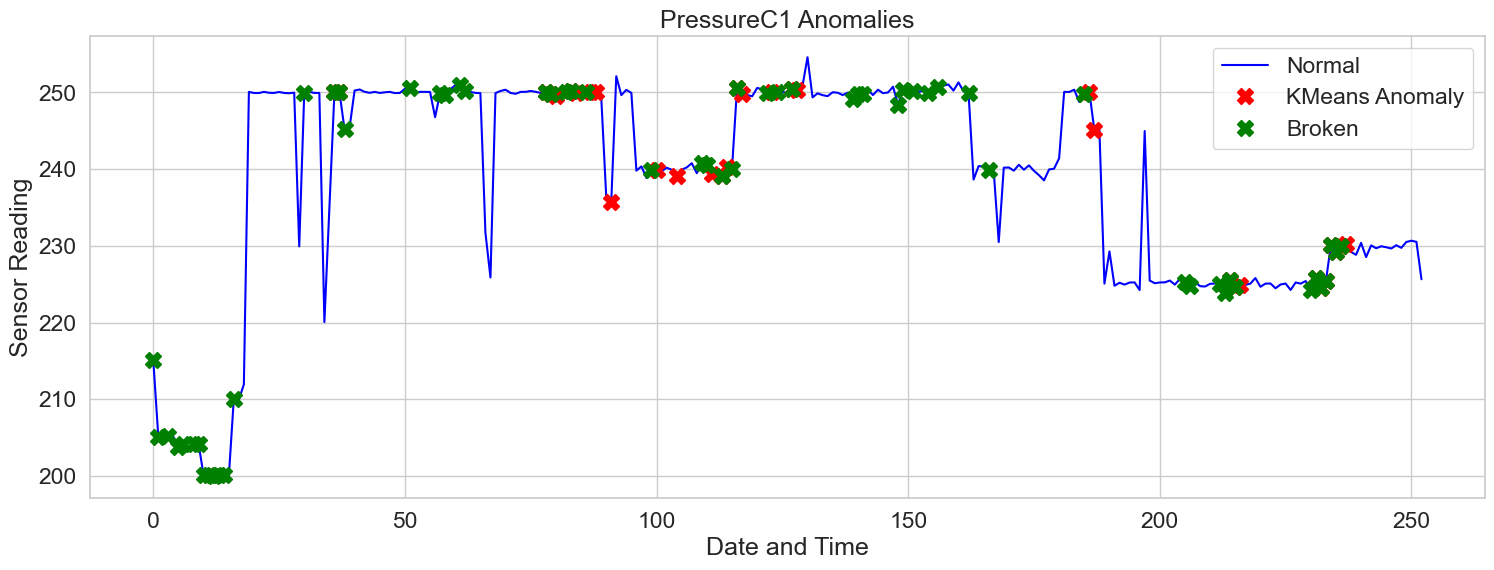

In [ ]:
dataset['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=dataset.index)
a = dataset[dataset['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(dataset['PressureC1'], color='blue', label='Normal')
_ = plt.plot(a['PressureC1'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['PressureC1'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('PressureC1 Anomalies')
_ = plt.legend(loc='best')
plt.show()

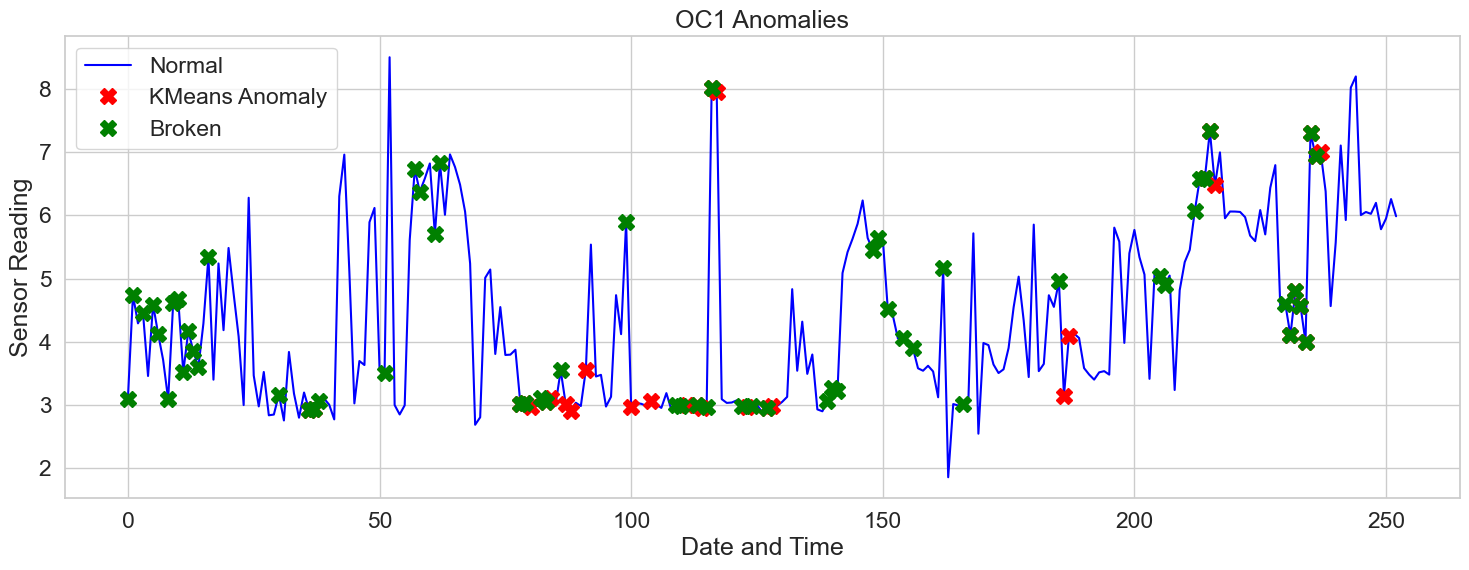

In [ ]:
dataset['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index=dataset.index)
a = dataset[dataset['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(dataset['OC1'], color='blue', label='Normal')
_ = plt.plot(a['OC1'], linestyle='none', marker='X', color='red', markersize=12, label='KMeans Anomaly')
_ = plt.plot(dfBroken['OC1'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('OC1 Anomalies')
_ = plt.legend(loc='best')
plt.show()

Model 2 - Isolation Forest

In [ ]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest

In [ ]:
# fit and predict
model_if =  IsolationForest(random_state=13)

model_if.fit(principal_df.drop('kmeans_anomaly', axis = 1))

principal_df['if_anomaly'] = pd.Series(model_if.predict(principal_df.drop('kmeans_anomaly', axis = 1)))

In [ ]:
principal_df['if_anomaly'].value_counts()

if_anomaly
 1    190
-1     63
Name: count, dtype: int64

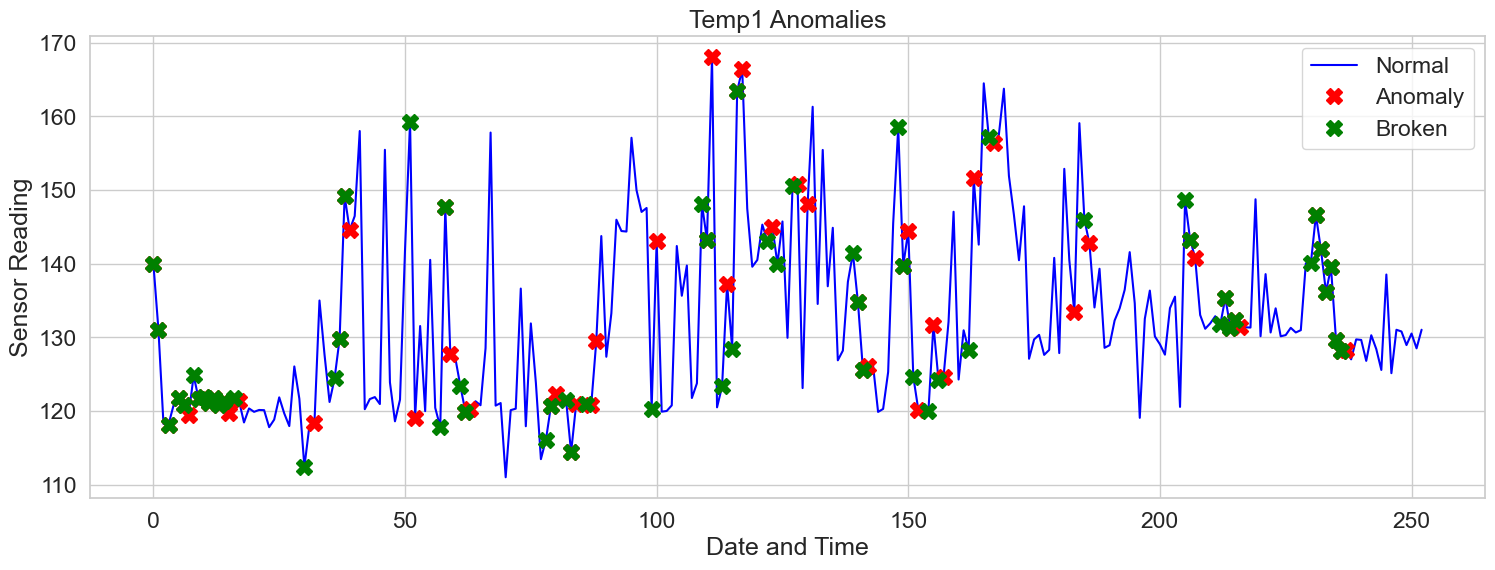

In [ ]:
dataset['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=dataset.index)
a = dataset[dataset['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(dataset['Temp1'], color='blue', label='Normal')
_ = plt.plot(a['Temp1'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['Temp1'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Temp1 Anomalies')
_ = plt.legend(loc='best')
plt.show();

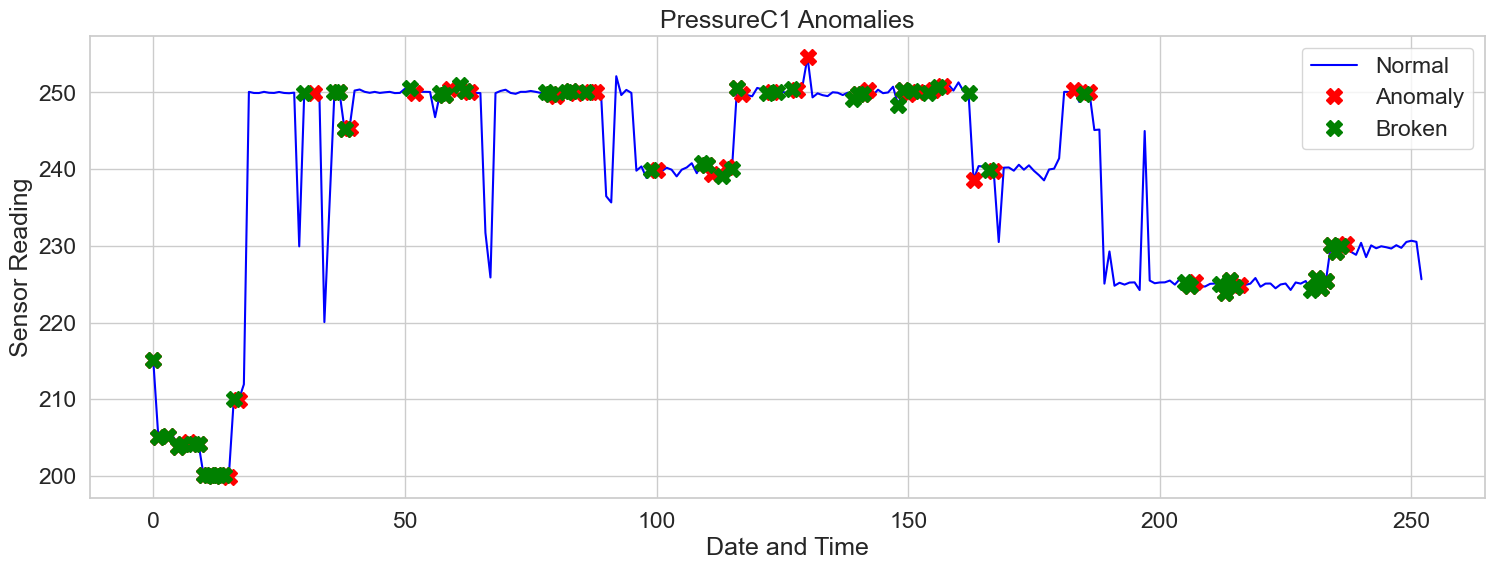

In [ ]:
dataset['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index=dataset.index)
a = dataset[dataset['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(dataset['PressureC1'], color='blue', label='Normal')
_ = plt.plot(a['PressureC1'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.plot(dfBroken['PressureC1'], linestyle='none', marker='X', color='green', markersize=12, label='Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('PressureC1 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
predictions = dataset[['Status', 'kmeans_anomaly', 'if_anomaly']]

In [ ]:
# if anomaly uniformity. 1 is 0 and -1 is 1
predictions.loc[predictions["if_anomaly"] == 1, "if_anomaly"] = 0
predictions.loc[predictions["if_anomaly"] == -1, "if_anomaly"] = 1

In [ ]:
predictions

,Status,kmeans_anomaly,if_anomaly
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
248,0,0,0
249,0,0,0
250,0,0,0
251,0,0,0


In [ ]:
# turning machine status numerical
#predictions["Status"] = predictions["Status"].map({"Normal": 0, "Danger": 1})

In [ ]:
# classification report
print(classification_report(predictions['Status'].values, predictions['kmeans_anomaly'].values))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       193
           1       0.50      0.27      0.35        60

    accuracy                           0.76       253
   macro avg       0.65      0.59      0.60       253
weighted avg       0.73      0.76      0.73       253



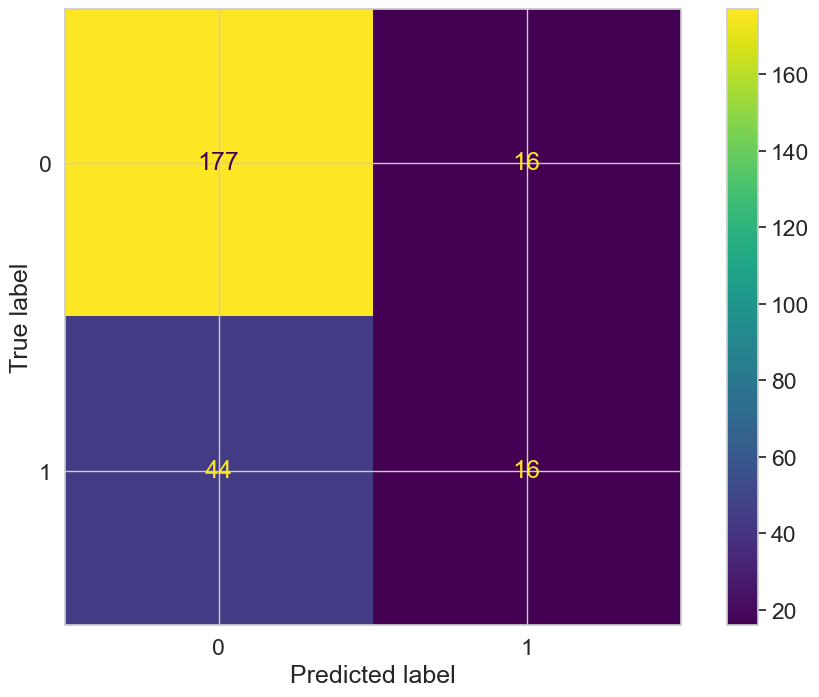

In [ ]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(predictions['Status'].values,
                                        predictions['kmeans_anomaly'].values)
plt.show()

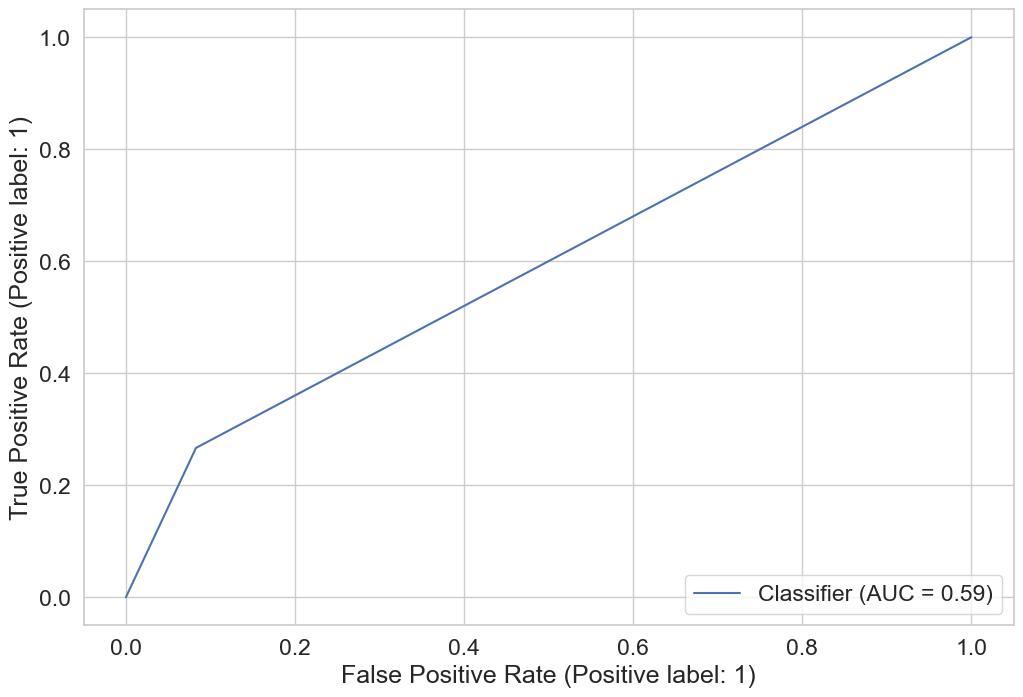

In [ ]:
# roc curve
RocCurveDisplay.from_predictions(predictions['Status'],
                                 predictions['kmeans_anomaly'])
plt.show()

In [ ]:
print(classification_report(predictions['Status'],
                            predictions['if_anomaly']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       193
           1       0.51      0.53      0.52        60

    accuracy                           0.77       253
   macro avg       0.68      0.69      0.68       253
weighted avg       0.77      0.77      0.77       253



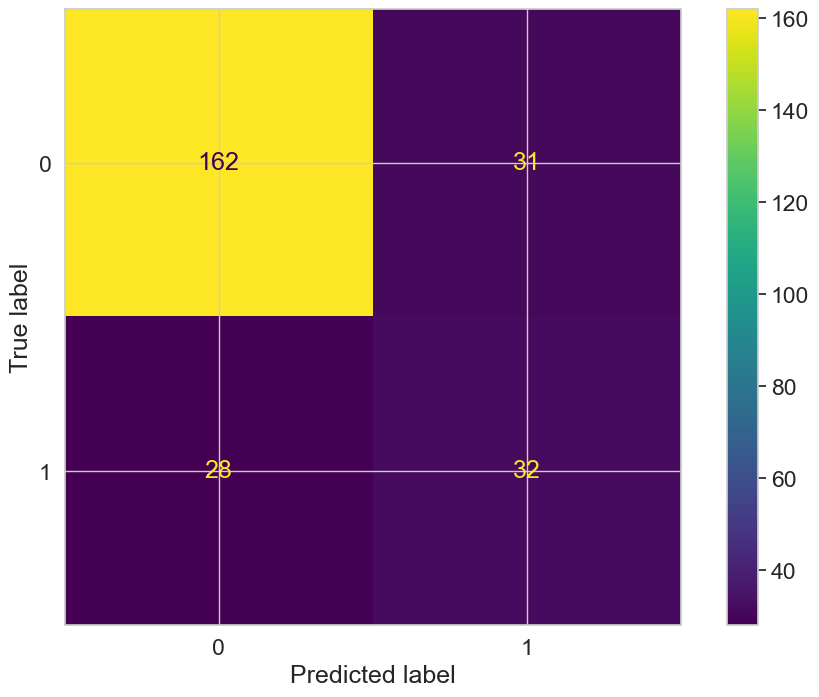

In [ ]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(predictions['Status'].values,
                                        predictions['if_anomaly'].values)
plt.show()

In [ ]:
a=np.array(predictions['if_anomaly'])
for i in range(253):
  print(i +1, a[i])